In [1]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

# Check number of combinations, just to be sure.


features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']


import itertools

def list_of_combs(arr):
    """returns a list of all subsets of a list"""
    
    combs = []
    for i in range(1, len(arr)+1):
        listing = [list(x) for x in itertools.combinations(arr, i)]
        combs.extend(listing)
    return combs

# Not used, does not produce a good list..
#
#for l in range(1, len(features)+1):
#    for subset in itertools.combinations(features, l):
#        print(subset)
#        
#comb = list()
#
#for i in range(0,len(features)):
#    for a in itertools.combinations(features,i+1):
#        comb.append(a)

combinations = list_of_combs(features)
for i in range(len(combinations)):
    print(combinations[i])

print('\nNumber of combinations:',len(combinations))


Loading database ...
Time to load database: 4.200602769851685
['rpm']
['frp']
['exh_T']
['TC_rpm']
['rpm', 'frp']
['rpm', 'exh_T']
['rpm', 'TC_rpm']
['frp', 'exh_T']
['frp', 'TC_rpm']
['exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T']
['rpm', 'frp', 'TC_rpm']
['rpm', 'exh_T', 'TC_rpm']
['frp', 'exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T', 'TC_rpm']

Number of combinations: 15


In [2]:

# The combinations are done manually in an Excel workbook, it was too tedious to make. This way it is easier but
# might not be the best way... it works...


feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [3]:
df_train = pd.DataFrame()
for i in range(len(test_features)):
    df_train = df_train.append(df[test_features[i]]).resample('15min').mean()
    

df_train = df_train.dropna()

# Filter out below zero
    

for n in list(df_train):
    df_train[n][(df_train[n] < 0)] = 0
    

date_begin = '2014-02-01'
date_end = '2014-12-16'

df_train = df_train[date_begin:date_end]

print(df_train.describe())

       AE1 ENG SPEED:1745:RPM:Average:900  \
count                        30624.000000   
mean                           394.698595   
std                            367.883957   
min                              0.000000   
25%                              0.000000   
50%                            737.733333   
75%                            750.466667   
max                            760.000000   

       AE1 EXH MEAN VALUE:1591:  C:Average:900  \
count                             30624.000000   
mean                                222.944978   
std                                 146.610908   
min                                   0.000000   
25%                                  75.466667   
50%                                 320.400000   
75%                                 359.533333   
max                                 431.066667   

       AE1 FUEL RACK POSIT:1742:mm:Average:900  \
count                             30624.000000   
mean                                 10.828

In [ ]:
# Train models and produce results...
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Train a linear model just for comparison.

gen = 10
cores = -1

results = list()
cols = ['test_no','model','CV-score','CV_perc']

df_out = pd.DataFrame()

df_out['y_13'] = df_train[d['fo_booster_13']]
df_out['y_24'] = df_train[d['fo_booster_24']]


seed = 42 # This is to get reproduce.


for test_no in range(len(test_features)):
    
    
    # Feature selection for the test run
    print('Test run', test_no, '\n')
    
    df_test = df_train[test_features[test_no]]
    # drop the last column, which is the measured
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    # y is the measured value
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])
    
    # make a test and train split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)
    
    # 
    
    print('Test number, linear model: ', test_no, '\n')
    m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
    m_linear.fit(X_train, y_train.reshape(-1,))
    
    df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

    score = m_linear.score(X_test,y_test)
    score_perc = m_linear.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'linear',score,score_perc])
    
    # tpot model
    
    print('Test number, TPOT model: ', test_no, '\n')

    m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    m_tpot.fit(X_train, y_train.reshape(-1,))
    
    df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)

    score = m_tpot.score(X_test,y_test)
    score_perc = m_tpot.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'tpot',score,score_perc])
    
    

results = pd.DataFrame(results, columns=cols)
results.to_excel('results/run_180207/test_run.xlsx')
df_out.to_hdf('results/run_180207/df_out.h5','table',complevel=9,complib='blosc')


Test run 0 

Test number, linear model:  0 

Score:  0.865426687326
Score in % of max:  0.319487083507
Test number, TPOT model:  0 



/home/fredde/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Optimization Progress:  18%|█▊        | 101/550 [06:16<2:47:24, 22.37s/pipeline]

Generation 1 - Current best internal CV score: -0.004048788979073506


Optimization Progress:  27%|██▋       | 151/550 [07:28<1:51:35, 16.78s/pipeline]

Generation 2 - Current best internal CV score: -0.004048788979073506


Optimization Progress:  37%|███▋      | 202/550 [13:42<1:43:48, 17.90s/pipeline]

Generation 3 - Current best internal CV score: -0.0040388883110180724


Optimization Progress:  46%|████▌     | 252/550 [15:52<1:14:01, 14.91s/pipeline]

Generation 4 - Current best internal CV score: -0.0040388883110180724


Optimization Progress:  55%|█████▍    | 302/550 [19:43<1:42:30, 24.80s/pipeline]

Generation 5 - Current best internal CV score: -0.0040388883110180724


Optimization Progress:  64%|██████▍   | 352/550 [22:40<1:42:31, 31.07s/pipeline]

Generation 6 - Current best internal CV score: -0.0040388883110180724


Optimization Progress:  73%|███████▎  | 403/550 [28:38<2:54:54, 71.39s/pipeline] 

Generation 7 - Current best internal CV score: -0.0040388883110180724


Optimization Progress:  82%|████████▏ | 453/550 [30:55<43:38, 26.99s/pipeline]  

Generation 8 - Current best internal CV score: -0.004033823254954178


Optimization Progress:  91%|█████████▏| 503/550 [35:16<16:09, 20.63s/pipeline]

Generation 9 - Current best internal CV score: -0.004001360867370079


Generation 10 - Current best internal CV score: -0.0039861114634467

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.85, learning_rate=0.1, loss=ls, max_depth=6, max_features=0.9, min_samples_leaf=3, min_samples_split=20, n_estimators=100, subsample=0.8)
Score:  -0.00401578275077
Score in % of max:  -0.00148249497945
Test run 1 

Test number, linear model:  1 

Score:  0.942642737598
Score in % of max:  0.347992710919
Test number, TPOT model:  1 



Optimization Progress:  19%|█▊        | 103/550 [15:32<5:34:31, 44.90s/pipeline]

Generation 1 - Current best internal CV score: -0.0018929989608625713


Optimization Progress:  28%|██▊       | 153/550 [18:45<2:31:29, 22.89s/pipeline]

Generation 2 - Current best internal CV score: -0.0018929989608625713


Optimization Progress:  37%|███▋      | 203/550 [22:53<1:32:41, 16.03s/pipeline]

Generation 3 - Current best internal CV score: -0.0018541544555735205


Optimization Progress:  46%|████▌     | 253/550 [26:04<50:39, 10.24s/pipeline]  

Generation 4 - Current best internal CV score: -0.001812232528520049


Optimization Progress:  55%|█████▌    | 303/550 [32:07<1:33:29, 22.71s/pipeline]

Generation 5 - Current best internal CV score: -0.0017793832708601128


Optimization Progress:  64%|██████▍   | 353/550 [35:01<55:27, 16.89s/pipeline]  

Generation 6 - Current best internal CV score: -0.0017793832708601128


Optimization Progress:  73%|███████▎  | 403/550 [37:25<1:02:58, 25.71s/pipeline]

Generation 7 - Current best internal CV score: -0.0017793832708601128


Optimization Progress:  82%|████████▏ | 453/550 [42:23<1:33:03, 57.57s/pipeline]

Generation 8 - Current best internal CV score: -0.0017793832708601128


Optimization Progress:  91%|█████████▏| 503/550 [45:14<34:10, 43.63s/pipeline]  

Generation 9 - Current best internal CV score: -0.001778523068732067


Generation 10 - Current best internal CV score: -0.001778523068732067

Best pipeline: XGBRegressor(ElasticNetCV(input_matrix, l1_ratio=0.2, tol=0.001), learning_rate=0.1, max_depth=8, min_child_weight=13, n_estimators=100, nthread=1, subsample=0.75)
Score:  -0.00196950387957
Score in % of max:  -0.000727076088196
Test run 2 

Test number, linear model:  2 

Score:  0.837550542501
Score in % of max:  0.30919612722
Test number, TPOT model:  2 



Optimization Progress:  18%|█▊        | 100/550 [03:51<2:22:33, 19.01s/pipeline]

Generation 1 - Current best internal CV score: -0.005268768307849549


Optimization Progress:  27%|██▋       | 150/550 [06:17<2:50:08, 25.52s/pipeline]

Generation 2 - Current best internal CV score: -0.005268768307849549


Optimization Progress:  36%|███▋      | 200/550 [09:44<3:18:35, 34.04s/pipeline]

Generation 3 - Current best internal CV score: -0.005234500912285833


Optimization Progress:  46%|████▌     | 251/550 [16:12<3:31:06, 42.36s/pipeline]

Generation 4 - Current best internal CV score: -0.005234500912285833


Optimization Progress:  55%|█████▍    | 302/550 [24:18<3:30:24, 50.90s/pipeline]

Generation 5 - Current best internal CV score: -0.005234500912285833


Optimization Progress:  64%|██████▍   | 352/550 [29:57<2:00:20, 36.47s/pipeline]

Generation 6 - Current best internal CV score: -0.004978868271611815


Optimization Progress:  73%|███████▎  | 402/550 [36:59<3:02:02, 73.80s/pipeline] 

Generation 7 - Current best internal CV score: -0.004978868271611815


Optimization Progress:  82%|████████▏ | 453/550 [47:43<2:27:23, 91.17s/pipeline] 

Generation 8 - Current best internal CV score: -0.004978868271611815


Optimization Progress:  92%|█████████▏| 504/550 [58:07<45:01, 58.73s/pipeline]  

Generation 9 - Current best internal CV score: -0.004978868271611815


Generation 10 - Current best internal CV score: -0.004978868271611815

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.05, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.00460841784312
Score in % of max:  -0.00170127637366
Test run 3 

Test number, linear model:  3 

Score:  0.965630675549
Score in % of max:  0.356479101921
Test number, TPOT model:  3 



Optimization Progress:  18%|█▊        | 100/550 [03:03<1:09:44,  9.30s/pipeline]

Generation 1 - Current best internal CV score: -0.001641091027954944


Optimization Progress:  27%|██▋       | 150/550 [04:32<1:33:06, 13.97s/pipeline]

Generation 2 - Current best internal CV score: -0.001641091027954944


Optimization Progress:  36%|███▋      | 200/550 [07:01<1:02:41, 10.75s/pipeline]

Generation 3 - Current best internal CV score: -0.001641091027954944


Optimization Progress:  45%|████▌     | 250/550 [13:08<4:29:04, 53.81s/pipeline]

Generation 4 - Current best internal CV score: -0.001641091027954944


Optimization Progress:  55%|█████▍    | 300/550 [17:11<2:41:51, 38.85s/pipeline]

Generation 5 - Current best internal CV score: -0.001641091027954944


Optimization Progress:  64%|██████▎   | 350/550 [21:01<1:38:12, 29.46s/pipeline]

Generation 6 - Current best internal CV score: -0.0016217585702562576


Optimization Progress:  73%|███████▎  | 400/550 [23:17<1:04:26, 25.78s/pipeline]

Generation 7 - Current best internal CV score: -0.0016174046934620088


Optimization Progress:  82%|████████▏ | 450/550 [25:38<25:44, 15.44s/pipeline]  

Generation 8 - Current best internal CV score: -0.0016174046934620088


Optimization Progress:  91%|█████████ | 500/550 [27:45<11:19, 13.59s/pipeline]

Generation 9 - Current best internal CV score: -0.001616004734867028


Generation 10 - Current best internal CV score: -0.001612229783095678

Best pipeline: XGBRegressor(ZeroCount(LinearSVR(input_matrix, C=5.0, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, tol=0.01)), learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.85)
Score:  -0.00172227552477
Score in % of max:  -0.000635807506822
Test run 4 

Test number, linear model:  4 

Score:  0.96912313896
Score in % of max:  0.357768404603
Test number, TPOT model:  4 



Optimization Progress:  18%|█▊        | 101/550 [08:26<3:35:18, 28.77s/pipeline]

Generation 1 - Current best internal CV score: -0.0011862875032504004


Optimization Progress:  28%|██▊       | 152/550 [15:06<8:03:55, 72.95s/pipeline]  

Generation 2 - Current best internal CV score: -0.0011862875032504004


Optimization Progress:  37%|███▋      | 202/550 [18:51<4:10:09, 43.13s/pipeline]

Generation 3 - Current best internal CV score: -0.0011862875032504004


Optimization Progress:  46%|████▌     | 252/550 [25:50<5:28:10, 66.08s/pipeline]

Generation 4 - Current best internal CV score: -0.0011314615302174744


Optimization Progress:  55%|█████▍    | 302/550 [30:57<4:26:18, 64.43s/pipeline]

Generation 5 - Current best internal CV score: -0.0010794402874898953


Optimization Progress:  64%|██████▍   | 352/550 [36:23<2:34:38, 46.86s/pipeline]

Generation 6 - Current best internal CV score: -0.0010794402874898953


Optimization Progress:  73%|███████▎  | 402/550 [42:14<2:35:31, 63.05s/pipeline]

Generation 7 - Current best internal CV score: -0.0010794402874898953


Optimization Progress:  82%|████████▏ | 452/550 [48:18<1:56:57, 71.61s/pipeline] 

Generation 8 - Current best internal CV score: -0.0010794402874898953


Optimization Progress:  91%|█████████▏| 503/550 [59:02<43:11, 55.14s/pipeline]  

Generation 9 - Current best internal CV score: -0.001060820394177531


Generation 10 - Current best internal CV score: -0.001060820394177531

Best pipeline: XGBRegressor(PolynomialFeatures(SelectFwe(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.001), alpha=0.046), degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=8, min_child_weight=12, n_estimators=100, nthread=1, subsample=0.95)
Score:  -0.00124024788541
Score in % of max:  -0.000457858748219
Test run 5 

Test number, linear model:  5 

Score:  0.912475585194
Score in % of max:  0.336855989946
Test number, TPOT model:  5 



Optimization Progress:  18%|█▊        | 100/550 [09:54<8:13:41, 65.82s/pipeline]

Generation 1 - Current best internal CV score: -0.0011488937433674544


Optimization Progress:  27%|██▋       | 150/550 [15:46<7:16:01, 65.40s/pipeline] 

Generation 2 - Current best internal CV score: -0.0011443483110933311


Optimization Progress:  37%|███▋      | 201/550 [24:21<8:53:16, 91.68s/pipeline]  

Generation 3 - Current best internal CV score: -0.001066003025612836


Optimization Progress:  46%|████▌     | 254/550 [38:28<4:39:41, 56.70s/pipeline]  

Generation 4 - Current best internal CV score: -0.0010407150385296593


Optimization Progress:  55%|█████▌    | 304/550 [51:03<2:33:23, 37.41s/pipeline]

Generation 5 - Current best internal CV score: -0.0010407150385296593


Optimization Progress:  64%|██████▍   | 354/550 [59:44<4:06:45, 75.54s/pipeline] 

Generation 6 - Current best internal CV score: -0.0009356723002004379


Optimization Progress:  74%|███████▎  | 405/550 [1:09:20<4:03:03, 100.58s/pipeline]

Generation 7 - Current best internal CV score: -0.0009354894772895174


Optimization Progress:  83%|████████▎ | 457/550 [1:19:57<3:20:08, 129.12s/pipeline]

Generation 8 - Current best internal CV score: -0.0009354894772895174


Optimization Progress:  92%|█████████▏| 507/550 [1:26:26<52:59, 73.94s/pipeline]   

Generation 9 - Current best internal CV score: -0.0009354894772895174


Generation 10 - Current best internal CV score: -0.0009354894772895174

Best pipeline: ExtraTreesRegressor(StandardScaler(input_matrix), bootstrap=False, max_features=0.8, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
Score:  -0.000897780213548
Score in % of max:  -0.00033143094182
Test run 6 

Test number, linear model:  6 

Score:  0.97281318255
Score in % of max:  0.359130647393
Test number, TPOT model:  6 



Optimization Progress:  18%|█▊        | 100/550 [05:47<1:24:46, 11.30s/pipeline]

Generation 1 - Current best internal CV score: -0.0014335124780917978


Optimization Progress:  27%|██▋       | 151/550 [12:52<3:57:44, 35.75s/pipeline]

Generation 2 - Current best internal CV score: -0.0014335124780917978


Optimization Progress:  37%|███▋      | 201/550 [17:14<2:55:40, 30.20s/pipeline]

Generation 3 - Current best internal CV score: -0.0014335124780917978


Optimization Progress:  46%|████▌     | 252/550 [24:25<6:19:05, 76.33s/pipeline]  

Generation 4 - Current best internal CV score: -0.0013845594824485445


Optimization Progress:  55%|█████▍    | 302/550 [31:30<5:42:08, 82.78s/pipeline] 

Generation 5 - Current best internal CV score: -0.0013845594824485445


Optimization Progress:  64%|██████▍   | 353/550 [40:16<6:28:04, 118.20s/pipeline] 

Generation 6 - Current best internal CV score: -0.0013388937782558307


Optimization Progress:  73%|███████▎  | 403/550 [49:06<4:21:33, 106.76s/pipeline]

Generation 7 - Current best internal CV score: -0.00129798999396314


Optimization Progress:  82%|████████▏ | 453/550 [1:01:11<2:04:24, 76.95s/pipeline]

Generation 8 - Current best internal CV score: -0.00129798999396314


Optimization Progress:  91%|█████████▏| 503/550 [1:09:14<1:10:58, 90.61s/pipeline] 

Generation 9 - Current best internal CV score: -0.00129798999396314


Generation 10 - Current best internal CV score: -0.001296635509594695

Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.25, tol=1e-05), bootstrap=False, max_features=0.45, min_samples_leaf=1, min_samples_split=8, n_estimators=100)
Score:  -0.00129725970943
Score in % of max:  -0.000478905639482
Test run 7 

Test number, linear model:  7 

Score:  0.972254416626
Score in % of max:  0.358924369382
Test number, TPOT model:  7 



Optimization Progress:  18%|█▊        | 100/550 [09:23<3:31:31, 28.20s/pipeline]

Generation 1 - Current best internal CV score: -0.000675228910243806


Optimization Progress:  27%|██▋       | 150/550 [12:44<1:57:08, 17.57s/pipeline]

Generation 2 - Current best internal CV score: -0.0006732351801679348


Optimization Progress:  36%|███▋      | 200/550 [20:24<5:15:13, 54.04s/pipeline]  

Generation 3 - Current best internal CV score: -0.0004208453691796482


Optimization Progress:  46%|████▌     | 251/550 [31:19<5:01:05, 60.42s/pipeline]

Generation 4 - Current best internal CV score: -0.0004208446736858512


Optimization Progress:  55%|█████▌    | 303/550 [42:28<6:03:34, 88.32s/pipeline] 

Generation 5 - Current best internal CV score: -0.0004208446736858512


Optimization Progress:  64%|██████▍   | 354/550 [54:44<6:23:31, 117.41s/pipeline] 

Generation 6 - Current best internal CV score: -0.0004208446736858512


Optimization Progress:  74%|███████▎  | 405/550 [1:02:12<1:39:39, 41.24s/pipeline]

Generation 7 - Current best internal CV score: -0.0004208446736858512


Optimization Progress:  83%|████████▎ | 455/550 [1:10:20<1:49:01, 68.86s/pipeline]

Generation 8 - Current best internal CV score: -0.0004208446736858512


Optimization Progress:  92%|█████████▏| 505/550 [1:16:35<54:51, 73.15s/pipeline]   

Generation 9 - Current best internal CV score: -0.0004208446736858512


Generation 10 - Current best internal CV score: -0.0004208446736858512

Best pipeline: XGBRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=100), learning_rate=0.5, max_depth=6, min_child_weight=6, n_estimators=100, nthread=1, subsample=1.0)
Score:  -0.00045657075227
Score in % of max:  -0.000168550912739
Test run 8 

Test number, linear model:  8 

Score:  0.980928813665
Score in % of max:  0.362126671612
Test number, TPOT model:  8 



Optimization Progress:  18%|█▊        | 100/550 [03:18<1:13:05,  9.74s/pipeline]

Generation 1 - Current best internal CV score: -0.0005444123584602492


Optimization Progress:  27%|██▋       | 150/550 [05:49<1:35:16, 14.29s/pipeline]

Generation 2 - Current best internal CV score: -0.0005444123584602492


Optimization Progress:  36%|███▋      | 200/550 [10:35<4:16:17, 43.94s/pipeline]

Generation 3 - Current best internal CV score: -0.0004748258433457619


Optimization Progress:  45%|████▌     | 250/550 [17:29<3:09:11, 37.84s/pipeline]

Generation 4 - Current best internal CV score: -0.0004748258433457619


Optimization Progress:  55%|█████▍    | 300/550 [23:48<5:00:34, 72.14s/pipeline] 

Generation 5 - Current best internal CV score: -0.0003793397655015423


Optimization Progress:  64%|██████▎   | 350/550 [28:11<1:51:11, 33.36s/pipeline]

Generation 6 - Current best internal CV score: -0.0003793397655015423


Optimization Progress:  73%|███████▎  | 401/550 [35:52<1:55:16, 46.42s/pipeline]

Generation 7 - Current best internal CV score: -0.0003712247001949304


Optimization Progress:  82%|████████▏ | 451/550 [40:47<1:31:55, 55.71s/pipeline]

Generation 8 - Current best internal CV score: -0.000362986888893917


Optimization Progress:  91%|█████████▏| 503/550 [48:50<1:17:51, 99.40s/pipeline] 

Generation 9 - Current best internal CV score: -0.000362986888893917


Generation 10 - Current best internal CV score: -0.000362986888893917

Best pipeline: DecisionTreeRegressor(XGBRegressor(ExtraTreesRegressor(LassoLarsCV(PCA(input_matrix, iterated_power=7, svd_solver=randomized), normalize=True), bootstrap=False, max_features=1.0, min_samples_leaf=2, min_samples_split=8, n_estimators=100), learning_rate=0.01, max_depth=10, min_child_weight=15, n_estimators=100, nthread=1, subsample=0.4), max_depth=8, min_samples_leaf=14, min_samples_split=20)
Score:  -0.000356031365911
Score in % of max:  -0.000131435076359
Test run 9 

Test number, linear model:  9 

Score:  0.975055879313
Score in % of max:  0.359958577313
Test number, TPOT model:  9 



Optimization Progress:  18%|█▊        | 100/550 [08:39<4:37:22, 36.98s/pipeline]

Generation 1 - Current best internal CV score: -0.0007682059361018612


Optimization Progress:  27%|██▋       | 150/550 [13:15<4:26:42, 40.01s/pipeline]

Generation 2 - Current best internal CV score: -0.0007682059361018612


Optimization Progress:  36%|███▋      | 200/550 [24:47<5:25:26, 55.79s/pipeline]

Generation 3 - Current best internal CV score: -0.0007682059361018612


Optimization Progress:  45%|████▌     | 250/550 [38:20<10:41:14, 128.25s/pipeline]

Generation 4 - Current best internal CV score: -0.0007682059361018612


Optimization Progress:  55%|█████▍    | 301/550 [48:04<9:08:15, 132.11s/pipeline] 

Generation 5 - Current best internal CV score: -0.0007321012759578192


Optimization Progress:  64%|██████▍   | 351/550 [58:47<4:05:42, 74.08s/pipeline] 

Generation 6 - Current best internal CV score: -0.0007080147094499802


Optimization Progress:  73%|███████▎  | 402/550 [1:10:07<2:23:48, 58.30s/pipeline]

Generation 7 - Current best internal CV score: -0.0007080147094499802


Optimization Progress:  82%|████████▏ | 452/550 [1:17:13<1:53:50, 69.70s/pipeline]

Generation 8 - Current best internal CV score: -0.0007080147094499802


Optimization Progress:  91%|█████████▏| 502/550 [1:24:19<55:55, 69.90s/pipeline]  

Generation 9 - Current best internal CV score: -0.0007080147094499802


Generation 10 - Current best internal CV score: -0.0007080147094499802

Best pipeline: ExtraTreesRegressor(XGBRegressor(input_matrix, learning_rate=0.5, max_depth=8, min_child_weight=17, n_estimators=100, nthread=1, subsample=0.95), bootstrap=False, max_features=0.65, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
Score:  -0.000638298529004
Score in % of max:  -0.000235638833913
Test run 10 

Test number, linear model:  10 

Score:  0.973281347402
Score in % of max:  0.359303478466
Test number, TPOT model:  10 



Optimization Progress:  18%|█▊        | 100/550 [15:28<11:20:51, 90.78s/pipeline]

Generation 1 - Current best internal CV score: -0.0006404428696278563


Optimization Progress:  28%|██▊       | 153/550 [25:48<6:15:49, 56.80s/pipeline] 

Generation 2 - Current best internal CV score: -0.0005720641707834268


Optimization Progress:  37%|███▋      | 203/550 [32:56<9:17:14, 96.35s/pipeline]  

Generation 3 - Current best internal CV score: -0.0005720641707834268


Optimization Progress:  46%|████▋     | 255/550 [42:54<5:05:00, 62.04s/pipeline]

Generation 4 - Current best internal CV score: -0.0005720641707834268


Optimization Progress:  56%|█████▌    | 307/550 [53:51<7:42:27, 114.19s/pipeline] 

Generation 5 - Current best internal CV score: -0.0003959197690433921


Optimization Progress:  65%|██████▌   | 358/550 [1:06:10<5:51:36, 109.88s/pipeline] 

Generation 6 - Current best internal CV score: -0.0003959197690433921


Optimization Progress:  74%|███████▍  | 408/550 [1:15:30<4:09:55, 105.60s/pipeline]

Generation 7 - Current best internal CV score: -0.0003959197690433921


Optimization Progress:  83%|████████▎ | 459/550 [1:25:48<2:00:55, 79.73s/pipeline] 

Generation 8 - Current best internal CV score: -0.0003959197690433921


Optimization Progress:  93%|█████████▎| 511/550 [1:37:07<1:21:15, 125.01s/pipeline]

Generation 9 - Current best internal CV score: -0.0003959197690433921


Generation 10 - Current best internal CV score: -0.0003959197690433921

Best pipeline: ExtraTreesRegressor(GradientBoostingRegressor(input_matrix, alpha=0.8, learning_rate=0.1, loss=ls, max_depth=10, max_features=0.75, min_samples_leaf=18, min_samples_split=10, n_estimators=100, subsample=0.6), bootstrap=True, max_features=0.55, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Score:  -0.000400389320567
Score in % of max:  -0.000147810575025
Test run 11 

Test number, linear model:  11 

Score:  0.984013873029
Score in % of max:  0.363265574114
Test number, TPOT model:  11 



Optimization Progress:  18%|█▊        | 100/550 [08:33<3:35:08, 28.68s/pipeline]

Generation 1 - Current best internal CV score: -0.0006556991474020909


Optimization Progress:  27%|██▋       | 151/550 [15:37<2:18:21, 20.80s/pipeline]

Generation 2 - Current best internal CV score: -0.0006556991474020909


Optimization Progress:  37%|███▋      | 201/550 [22:43<3:56:39, 40.69s/pipeline]

Generation 3 - Current best internal CV score: -0.0005254380030390394


Optimization Progress:  46%|████▌     | 251/550 [31:10<4:54:08, 59.03s/pipeline]

Generation 4 - Current best internal CV score: -0.0005254380030390394


Optimization Progress:  55%|█████▍    | 301/550 [35:36<2:19:31, 33.62s/pipeline]

Generation 5 - Current best internal CV score: -0.0005112007369044366


Optimization Progress:  64%|██████▍   | 351/550 [42:52<3:53:27, 70.39s/pipeline]

Generation 6 - Current best internal CV score: -0.0005112007369044366


Optimization Progress:  73%|███████▎  | 401/550 [50:05<3:11:02, 76.93s/pipeline] 

Generation 7 - Current best internal CV score: -0.0004418574812995425


Optimization Progress:  82%|████████▏ | 451/550 [58:35<2:47:43, 101.65s/pipeline]

Generation 8 - Current best internal CV score: -0.0004418574812995425


Optimization Progress:  91%|█████████ | 501/550 [1:05:41<1:18:31, 96.16s/pipeline] 

Generation 9 - Current best internal CV score: -0.0004418574812995425


Generation 10 - Current best internal CV score: -0.0004418574812995425

Best pipeline: GradientBoostingRegressor(LassoLarsCV(PCA(input_matrix, iterated_power=10, svd_solver=randomized), normalize=True), alpha=0.95, learning_rate=0.5, loss=ls, max_depth=9, max_features=0.55, min_samples_leaf=5, min_samples_split=15, n_estimators=100, subsample=0.8)
Score:  -0.000530534958629
Score in % of max:  -0.000195856066277
Test run 12 

Test number, linear model:  12 

Score:  0.979905447573
Score in % of max:  0.361748878493
Test number, TPOT model:  12 



Optimization Progress:  18%|█▊        | 101/550 [12:02<5:12:28, 41.76s/pipeline]

Generation 1 - Current best internal CV score: -0.0006354390240340261


Optimization Progress:  27%|██▋       | 151/550 [19:07<4:58:27, 44.88s/pipeline] 

Generation 2 - Current best internal CV score: -0.0006354390240340261


Optimization Progress:  37%|███▋      | 201/550 [26:15<7:17:07, 75.15s/pipeline]  

Generation 3 - Current best internal CV score: -0.0006353424419503005


Optimization Progress:  47%|████▋     | 256/550 [37:49<10:14:22, 125.38s/pipeline]

Generation 4 - Current best internal CV score: -0.0005754890416490797


Optimization Progress:  56%|█████▌    | 307/550 [52:01<11:23:28, 168.76s/pipeline]

Generation 5 - Current best internal CV score: -0.0005754890416490797


Optimization Progress:  65%|██████▍   | 357/550 [1:03:12<4:44:39, 88.50s/pipeline]

Generation 6 - Current best internal CV score: -0.0005754890416490797


Optimization Progress:  74%|███████▍  | 409/550 [1:15:15<4:10:53, 106.76s/pipeline]

Generation 7 - Current best internal CV score: -0.0005754890416490797


Optimization Progress:  83%|████████▎ | 459/550 [1:23:24<2:18:58, 91.63s/pipeline] 

Generation 8 - Current best internal CV score: -0.0005754890416490797


Optimization Progress:  93%|█████████▎| 513/550 [1:38:23<1:30:38, 146.98s/pipeline]

Generation 9 - Current best internal CV score: -0.0005754890416490797


Generation 10 - Current best internal CV score: -0.0005754890416490797

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.000547709927396
Score in % of max:  -0.000202196500148
Test run 13 

Test number, linear model:  13 

Score:  0.983931135259
Score in % of max:  0.363235030049
Test number, TPOT model:  13 



Optimization Progress:  18%|█▊        | 101/550 [12:22<4:51:47, 38.99s/pipeline]

Generation 1 - Current best internal CV score: -0.0007097935452631181


Optimization Progress:  27%|██▋       | 151/550 [18:11<5:40:41, 51.23s/pipeline]

Generation 2 - Current best internal CV score: -0.0007097935452631181


Optimization Progress:  37%|███▋      | 201/550 [24:47<5:22:44, 55.49s/pipeline]

Generation 3 - Current best internal CV score: -0.0007097935452631181


Optimization Progress:  46%|████▌     | 252/550 [33:32<8:21:16, 100.93s/pipeline] 

Generation 4 - Current best internal CV score: -0.0006339934894330922


Optimization Progress:  55%|█████▍    | 302/550 [39:52<5:18:48, 77.13s/pipeline] 

Generation 5 - Current best internal CV score: -0.0004939757575943022


Optimization Progress:  64%|██████▍   | 353/550 [53:19<6:54:33, 126.26s/pipeline] 

Generation 6 - Current best internal CV score: -0.0004939757575943022


Optimization Progress:  73%|███████▎  | 404/550 [1:05:41<5:28:45, 135.11s/pipeline] 

Generation 7 - Current best internal CV score: -0.0004939757575943022


Optimization Progress:  83%|████████▎ | 456/550 [1:18:33<3:52:42, 148.53s/pipeline]

Generation 8 - Current best internal CV score: -0.00045642408175065787


Optimization Progress:  92%|█████████▏| 508/550 [1:32:17<1:58:53, 169.85s/pipeline]

Generation 9 - Current best internal CV score: -0.00045642408175065787


Generation 10 - Current best internal CV score: -0.00044163968107592284

Best pipeline: XGBRegressor(LassoLarsCV(input_matrix, normalize=True), learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, nthread=1, subsample=0.85)
Score:  -0.000501941593417
Score in % of max:  -0.0001853003358
Test run 14 

Test number, linear model:  14 

Score:  0.985013551527
Score in % of max:  0.363634622552
Test number, TPOT model:  14 



Optimization Progress:  18%|█▊        | 101/550 [13:20<7:31:24, 60.32s/pipeline] 

Generation 1 - Current best internal CV score: -0.0006013099287984411


Optimization Progress:  28%|██▊       | 152/550 [22:17<5:25:40, 49.10s/pipeline]

Generation 2 - Current best internal CV score: -0.0005377594727512603


Optimization Progress:  37%|███▋      | 203/550 [32:42<9:22:44, 97.30s/pipeline]  

Generation 3 - Current best internal CV score: -0.0004414313125607512


Optimization Progress:  46%|████▋     | 255/550 [42:58<9:12:10, 112.31s/pipeline] 

Generation 4 - Current best internal CV score: -0.00041331255143474253


Optimization Progress:  56%|█████▌    | 308/550 [56:13<5:17:20, 78.68s/pipeline] 

Generation 5 - Current best internal CV score: -0.00041331255143474253


Optimization Progress:  65%|██████▌   | 359/550 [1:11:28<7:19:24, 138.03s/pipeline] 

Generation 6 - Current best internal CV score: -0.00041331255143474253


Optimization Progress:  75%|███████▍  | 410/550 [1:25:13<5:47:35, 148.97s/pipeline] 

Generation 7 - Current best internal CV score: -0.00041331255143474253


Optimization Progress:  84%|████████▍ | 462/550 [1:43:48<4:23:05, 179.38s/pipeline]

Generation 8 - Current best internal CV score: -0.0003978670798253267


Optimization Progress:  93%|█████████▎| 512/550 [1:56:25<1:29:35, 141.47s/pipeline]

Generation 9 - Current best internal CV score: -0.0003978670798253267


Generation 10 - Current best internal CV score: -0.0003978670798253267

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(LinearSVR(input_matrix, C=10.0, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.0001), bootstrap=False, max_features=0.35, min_samples_leaf=2, min_samples_split=8, n_estimators=100), bootstrap=False, max_features=0.4, min_samples_leaf=2, min_samples_split=19, n_estimators=100)
Score:  -0.000408819203979
Score in % of max:  -0.000150922610862
Test run 15 

Test number, linear model:  15 

Score:  0.866869086816
Score in % of max:  0.318996716873
Test number, TPOT model:  15 



Optimization Progress:  18%|█▊        | 100/550 [01:56<45:03,  6.01s/pipeline] 

Generation 1 - Current best internal CV score: -0.004030980000593344


Optimization Progress:  27%|██▋       | 150/550 [03:56<41:26,  6.22s/pipeline]  

Generation 2 - Current best internal CV score: -0.0040003688802810996


Optimization Progress:  36%|███▋      | 200/550 [06:30<2:15:19, 23.20s/pipeline]

Generation 3 - Current best internal CV score: -0.0040003688802810996


Optimization Progress:  45%|████▌     | 250/550 [09:53<1:40:30, 20.10s/pipeline]

Generation 4 - Current best internal CV score: -0.00391276898503806


Optimization Progress:  55%|█████▌    | 303/550 [22:19<6:58:59, 101.78s/pipeline] 

Generation 5 - Current best internal CV score: -0.0038619320036587593


Optimization Progress:  64%|██████▍   | 353/550 [26:56<2:07:50, 38.94s/pipeline] 

Generation 6 - Current best internal CV score: -0.0037757545107466248


Optimization Progress:  73%|███████▎  | 403/550 [32:04<1:40:08, 40.87s/pipeline]

Generation 7 - Current best internal CV score: -0.0037757545107466248


Optimization Progress:  83%|████████▎ | 456/550 [43:51<2:14:17, 85.71s/pipeline] 

Generation 8 - Current best internal CV score: -0.0037757545107466248


Optimization Progress:  92%|█████████▏| 507/550 [53:31<35:54, 50.11s/pipeline]  

Generation 9 - Current best internal CV score: -0.0037743807993279345


Generation 10 - Current best internal CV score: -0.0037743807993279345

Best pipeline: GradientBoostingRegressor(MaxAbsScaler(input_matrix), alpha=0.95, learning_rate=0.1, loss=ls, max_depth=7, max_features=0.9, min_samples_leaf=15, min_samples_split=6, n_estimators=100, subsample=0.9)
Score:  -0.00345999942186
Score in % of max:  -0.00127323545474
Test run 16 

Test number, linear model:  16 

Score:  0.975580976422
Score in % of max:  0.359001299337
Test number, TPOT model:  16 



Optimization Progress:  18%|█▊        | 100/550 [01:32<24:21,  3.25s/pipeline]

Generation 1 - Current best internal CV score: -0.001071958306365976


Optimization Progress:  27%|██▋       | 150/550 [02:46<27:12,  4.08s/pipeline]

Generation 2 - Current best internal CV score: -0.001071958306365976


Optimization Progress:  36%|███▋      | 200/550 [04:12<1:13:49, 12.66s/pipeline]

Generation 3 - Current best internal CV score: -0.001071958306365976


Optimization Progress:  45%|████▌     | 250/550 [07:13<2:43:42, 32.74s/pipeline]

Generation 4 - Current best internal CV score: -0.001071958306365976


Optimization Progress:  55%|█████▍    | 300/550 [08:33<1:25:40, 20.56s/pipeline]

Generation 5 - Current best internal CV score: -0.001071958306365976


Optimization Progress:  64%|██████▎   | 350/550 [10:21<1:10:00, 21.00s/pipeline]

Generation 6 - Current best internal CV score: -0.0010703570817893369


Optimization Progress:  73%|███████▎  | 401/550 [16:37<44:11, 17.79s/pipeline]  

Generation 7 - Current best internal CV score: -0.0010106728031085976


Optimization Progress:  82%|████████▏ | 451/550 [18:24<20:17, 12.30s/pipeline]

Generation 8 - Current best internal CV score: -0.0010106728031085976


Optimization Progress:  91%|█████████ | 501/550 [20:24<09:32, 11.69s/pipeline]

Generation 9 - Current best internal CV score: -0.0010027641647650674


Generation 10 - Current best internal CV score: -0.0009988208084525778

Best pipeline: XGBRegressor(LinearSVR(RobustScaler(input_matrix), C=0.5, dual=True, epsilon=1.0, loss=epsilon_insensitive, tol=0.01), learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100, nthread=1, subsample=0.5)
Score:  -0.000814583034063
Score in % of max:  -0.000299756119394
Test run 17 

Test number, linear model:  17 

Score:  0.852742930074
Score in % of max:  0.313798472188
Test number, TPOT model:  17 



Optimization Progress:  18%|█▊        | 100/550 [02:12<1:31:26, 12.19s/pipeline]

Generation 1 - Current best internal CV score: -0.005300803739247353


Optimization Progress:  27%|██▋       | 150/550 [05:10<2:13:01, 19.95s/pipeline]

Generation 2 - Current best internal CV score: -0.005300803739247353


Optimization Progress:  36%|███▋      | 200/550 [09:38<1:33:40, 16.06s/pipeline]

Generation 3 - Current best internal CV score: -0.00527997358522598


Optimization Progress:  45%|████▌     | 250/550 [12:27<2:17:00, 27.40s/pipeline]

Generation 4 - Current best internal CV score: -0.004643503342989098


Optimization Progress:  55%|█████▍    | 300/550 [16:06<2:41:06, 38.67s/pipeline]

Generation 5 - Current best internal CV score: -0.004643503342989098


Optimization Progress:  64%|██████▍   | 351/550 [22:59<4:26:15, 80.28s/pipeline] 

Generation 6 - Current best internal CV score: -0.004643503342989098


Optimization Progress:  73%|███████▎  | 402/550 [30:10<2:00:24, 48.82s/pipeline]

Generation 7 - Current best internal CV score: -0.004643503342989098


Optimization Progress:  82%|████████▏ | 453/550 [39:16<2:19:51, 86.51s/pipeline] 

Generation 8 - Current best internal CV score: -0.004643503342989098


Optimization Progress:  91%|█████████▏| 503/550 [43:25<37:44, 48.18s/pipeline]  

Generation 9 - Current best internal CV score: -0.004589573495335098


Generation 10 - Current best internal CV score: -0.004397179417161641

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.15, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Score:  -0.00377001625325
Score in % of max:  -0.00138731767649
Test run 18 

Test number, linear model:  18 

Score:  0.977585667259
Score in % of max:  0.359738999879
Test number, TPOT model:  18 



Optimization Progress:  18%|█▊        | 100/550 [01:52<32:20,  4.31s/pipeline]

Generation 1 - Current best internal CV score: -0.0006915494515745312


Optimization Progress:  27%|██▋       | 150/550 [03:14<1:13:03, 10.96s/pipeline]

Generation 2 - Current best internal CV score: -0.0005552147533325624


Optimization Progress:  36%|███▋      | 200/550 [04:54<1:39:39, 17.08s/pipeline]

Generation 3 - Current best internal CV score: -0.0005552147533325624


Optimization Progress:  46%|████▌     | 251/550 [10:41<5:43:08, 68.86s/pipeline]

Generation 4 - Current best internal CV score: -0.0004918900085609825


Optimization Progress:  55%|█████▍    | 301/550 [13:27<2:17:00, 33.02s/pipeline]

Generation 5 - Current best internal CV score: -0.0004899025960571684


Optimization Progress:  64%|██████▍   | 351/550 [19:09<3:45:45, 68.07s/pipeline]

Generation 6 - Current best internal CV score: -0.0004899025960571684


Optimization Progress:  73%|███████▎  | 401/550 [23:41<1:33:32, 37.67s/pipeline]

Generation 7 - Current best internal CV score: -0.0004899025960571684


Optimization Progress:  82%|████████▏ | 451/550 [30:19<1:33:14, 56.51s/pipeline]

Generation 8 - Current best internal CV score: -0.0004899025960571684


Optimization Progress:  91%|█████████ | 501/550 [35:28<46:08, 56.50s/pipeline]  

Generation 9 - Current best internal CV score: -0.0004899025960571684


Generation 10 - Current best internal CV score: -0.0004899025960571684

Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.85, tol=0.001), bootstrap=True, max_features=0.9, min_samples_leaf=2, min_samples_split=3, n_estimators=100)
Score:  -0.000451672353645
Score in % of max:  -0.000166209638925
Test run 19 

Test number, linear model:  19 

Score:  0.988418384658
Score in % of max:  0.363725301084
Test number, TPOT model:  19 



Optimization Progress:  18%|█▊        | 100/550 [03:09<2:25:56, 19.46s/pipeline]

Generation 1 - Current best internal CV score: -0.000559015438869274


Optimization Progress:  27%|██▋       | 150/550 [05:38<2:32:49, 22.92s/pipeline]

Generation 2 - Current best internal CV score: -0.000559015438869274


Optimization Progress:  37%|███▋      | 202/550 [16:33<7:53:23, 81.62s/pipeline]  

Generation 3 - Current best internal CV score: -0.000559015438869274


Optimization Progress:  46%|████▌     | 252/550 [21:46<3:13:01, 38.86s/pipeline]

Generation 4 - Current best internal CV score: -0.000559015438869274


Optimization Progress:  55%|█████▍    | 302/550 [26:36<2:03:51, 29.97s/pipeline]

Generation 5 - Current best internal CV score: -0.000559015438869274


Optimization Progress:  64%|██████▍   | 352/550 [31:31<1:32:05, 27.91s/pipeline]

Generation 6 - Current best internal CV score: -0.00047751428300956344


Optimization Progress:  73%|███████▎  | 403/550 [39:46<2:10:03, 53.09s/pipeline]

Generation 7 - Current best internal CV score: -0.00047751428300956344


Optimization Progress:  82%|████████▏ | 453/550 [43:48<50:39, 31.34s/pipeline]  

Generation 8 - Current best internal CV score: -0.00047751428300956344


Optimization Progress:  91%|█████████▏| 503/550 [49:59<27:07, 34.62s/pipeline]  

Generation 9 - Current best internal CV score: -0.00047751428300956344


Generation 10 - Current best internal CV score: -0.00047751428300956344

Best pipeline: ExtraTreesRegressor(MinMaxScaler(LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=True)), bootstrap=False, max_features=0.6, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
Score:  -0.000384750100817
Score in % of max:  -0.00014158310735
Test run 20 

Test number, linear model:  20 

Score:  0.939630161728
Score in % of max:  0.345771860163
Test number, TPOT model:  20 



Optimization Progress:  18%|█▊        | 100/550 [08:10<3:24:41, 27.29s/pipeline]

Generation 1 - Current best internal CV score: -0.0007613978359394091


Optimization Progress:  27%|██▋       | 150/550 [12:03<4:12:53, 37.93s/pipeline]

Generation 2 - Current best internal CV score: -0.0007451165962677178


Optimization Progress:  37%|███▋      | 201/550 [20:42<5:22:57, 55.52s/pipeline]

Generation 3 - Current best internal CV score: -0.0007451165962677178


Optimization Progress:  46%|████▌     | 251/550 [26:54<5:14:05, 63.03s/pipeline]

Generation 4 - Current best internal CV score: -0.0007112592240739216


Optimization Progress:  55%|█████▍    | 301/550 [33:36<5:04:44, 73.43s/pipeline] 

Generation 5 - Current best internal CV score: -0.00070739874308339


Optimization Progress:  64%|██████▍   | 352/550 [44:03<4:14:47, 77.21s/pipeline] 

Generation 6 - Current best internal CV score: -0.0006956238739929935


Optimization Progress:  73%|███████▎  | 402/550 [49:07<1:24:46, 34.37s/pipeline]

Generation 7 - Current best internal CV score: -0.0006956238739929935


Optimization Progress:  82%|████████▏ | 452/550 [55:19<1:56:46, 71.49s/pipeline] 

Generation 8 - Current best internal CV score: -0.0006956238739929935


Optimization Progress:  91%|█████████▏| 502/550 [59:55<38:18, 47.89s/pipeline]  

Generation 9 - Current best internal CV score: -0.00069369707270985


Generation 10 - Current best internal CV score: -0.0006918914806836312

Best pipeline: ExtraTreesRegressor(CombineDFs(PCA(input_matrix, iterated_power=1, svd_solver=randomized), input_matrix), bootstrap=False, max_features=0.85, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
Score:  -0.000562105669075
Score in % of max:  -0.000206847684036
Test run 21 

Test number, linear model:  21 

Score:  0.98390377502
Score in % of max:  0.362063982583
Test number, TPOT model:  21 



Optimization Progress:  18%|█▊        | 100/550 [04:45<2:47:31, 22.34s/pipeline]

Generation 1 - Current best internal CV score: -0.0005235588168936556


Optimization Progress:  27%|██▋       | 150/550 [07:39<3:28:46, 31.32s/pipeline]

Generation 2 - Current best internal CV score: -0.0004828080769255441


Optimization Progress:  37%|███▋      | 201/550 [14:44<2:16:24, 23.45s/pipeline]

Generation 3 - Current best internal CV score: -0.0004828080769255441


Optimization Progress:  46%|████▌     | 251/550 [19:21<2:20:01, 28.10s/pipeline]

Generation 4 - Current best internal CV score: -0.0004828080769255441


Optimization Progress:  55%|█████▍    | 301/550 [25:58<2:48:54, 40.70s/pipeline]

Generation 5 - Current best internal CV score: -0.0004339456866397298


Optimization Progress:  64%|██████▍   | 351/550 [30:59<2:58:27, 53.80s/pipeline]

Generation 6 - Current best internal CV score: -0.00040557913763875954


Optimization Progress:  73%|███████▎  | 402/550 [39:14<2:10:57, 53.09s/pipeline]

Generation 7 - Current best internal CV score: -0.00040435966264460485


Optimization Progress:  82%|████████▏ | 453/550 [47:16<2:45:29, 102.37s/pipeline]

Generation 8 - Current best internal CV score: -0.00040435966264460485


Optimization Progress:  92%|█████████▏| 504/550 [57:22<1:06:10, 86.32s/pipeline] 

Generation 9 - Current best internal CV score: -0.00040435966264460485


Generation 10 - Current best internal CV score: -0.00039834334309787813

Best pipeline: XGBRegressor(LinearSVR(GradientBoostingRegressor(input_matrix, alpha=0.8, learning_rate=0.001, loss=lad, max_depth=10, max_features=0.8, min_samples_leaf=18, min_samples_split=17, n_estimators=100, subsample=0.35), C=5.0, dual=False, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.001), learning_rate=0.1, max_depth=9, min_child_weight=11, n_estimators=100, nthread=1, subsample=0.5)
Score:  -0.000316736498698
Score in % of max:  -0.000116554973219
Test run 22 

Test number, linear model:  22 

Score:  0.990291145148
Score in % of max:  0.364414452949
Test number, TPOT model:  22 



Optimization Progress:  18%|█▊        | 100/550 [03:46<3:14:43, 25.96s/pipeline]

Generation 1 - Current best internal CV score: -0.0005188896520792457


Optimization Progress:  27%|██▋       | 151/550 [11:22<5:19:42, 48.08s/pipeline]

Generation 2 - Current best internal CV score: -0.0005188896520792457


Optimization Progress:  37%|███▋      | 201/550 [18:41<2:52:16, 29.62s/pipeline]

Generation 3 - Current best internal CV score: -0.00048526916513074987


Optimization Progress:  46%|████▌     | 251/550 [23:22<2:12:46, 26.64s/pipeline]

Generation 4 - Current best internal CV score: -0.00048526916513074987


Optimization Progress:  55%|█████▍    | 301/550 [30:10<4:27:02, 64.35s/pipeline]

Generation 5 - Current best internal CV score: -0.00048526916513074987


Optimization Progress:  64%|██████▍   | 352/550 [42:48<6:35:05, 119.73s/pipeline] 

Generation 6 - Current best internal CV score: -0.00044229097832792244


Optimization Progress:  73%|███████▎  | 404/550 [53:14<4:31:05, 111.40s/pipeline]

Generation 7 - Current best internal CV score: -0.00042726331564256774


Optimization Progress:  83%|████████▎ | 454/550 [59:57<2:06:26, 79.03s/pipeline] 

Generation 8 - Current best internal CV score: -0.00042726331564256774


Optimization Progress:  92%|█████████▏| 504/550 [1:10:30<54:40, 71.30s/pipeline]  

Generation 9 - Current best internal CV score: -0.0004216061464992196


Generation 10 - Current best internal CV score: -0.0004216061464992196

Best pipeline: XGBRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=17, n_estimators=100), learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.7)
Score:  -0.000323418923699
Score in % of max:  -0.000119014019999
Test run 23 

Test number, linear model:  23 

Score:  0.994631677407
Score in % of max:  0.366011713206
Test number, TPOT model:  23 



Optimization Progress:  18%|█▊        | 100/550 [03:06<1:56:55, 15.59s/pipeline]

Generation 1 - Current best internal CV score: -0.00047809739488073355


Optimization Progress:  27%|██▋       | 150/550 [06:22<2:18:11, 20.73s/pipeline]

Generation 2 - Current best internal CV score: -0.00046425350745460116


Optimization Progress:  36%|███▋      | 200/550 [08:33<2:06:24, 21.67s/pipeline]

Generation 3 - Current best internal CV score: -0.0004247461062746141


Optimization Progress:  45%|████▌     | 250/550 [13:21<1:45:49, 21.17s/pipeline]

Generation 4 - Current best internal CV score: -0.0004247461062746141


Optimization Progress:  55%|█████▍    | 300/550 [17:20<1:02:06, 14.91s/pipeline]

Generation 5 - Current best internal CV score: -0.0003751591780132771


Optimization Progress:  64%|██████▎   | 350/550 [21:13<1:25:04, 25.52s/pipeline]

Generation 6 - Current best internal CV score: -0.0003720485612593848


Optimization Progress:  73%|███████▎  | 400/550 [26:27<1:53:19, 45.33s/pipeline]

Generation 7 - Current best internal CV score: -0.0003566765159266863


Optimization Progress:  82%|████████▏ | 450/550 [30:14<1:16:20, 45.81s/pipeline]

Generation 8 - Current best internal CV score: -0.0003251617777191984


Optimization Progress:  91%|█████████ | 500/550 [33:57<25:12, 30.25s/pipeline]  

Generation 9 - Current best internal CV score: -0.00030686343019973954


Generation 10 - Current best internal CV score: -0.000305667692799056

Best pipeline: ExtraTreesRegressor(RidgeCV(ElasticNetCV(input_matrix, l1_ratio=0.55, tol=0.01)), bootstrap=False, max_features=0.55, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
Score:  -0.000243058980332
Score in % of max:  -8.94425904805e-05
Test run 24 

Test number, linear model:  24 

Score:  0.986565864567
Score in % of max:  0.363043597427
Test number, TPOT model:  24 



Optimization Progress:  18%|█▊        | 100/550 [05:59<3:28:14, 27.76s/pipeline]

Generation 1 - Current best internal CV score: -0.0006650502197946939


Optimization Progress:  27%|██▋       | 150/550 [08:48<3:35:51, 32.38s/pipeline]

Generation 2 - Current best internal CV score: -0.00058187168300253


Optimization Progress:  37%|███▋      | 201/550 [15:55<7:31:43, 77.66s/pipeline]  

Generation 3 - Current best internal CV score: -0.000576681510251162


Optimization Progress:  46%|████▌     | 251/550 [21:50<6:18:09, 75.88s/pipeline]  

Generation 4 - Current best internal CV score: -0.0005090855223190895


Optimization Progress:  55%|█████▍    | 301/550 [26:39<3:39:19, 52.85s/pipeline]

Generation 5 - Current best internal CV score: -0.00046075464137932564


Optimization Progress:  55%|█████▌    | 303/550 [26:44<1:49:11, 26.52s/pipeline]

AttributeError: module 'matplotlib.pyplot' has no attribute 'labels'

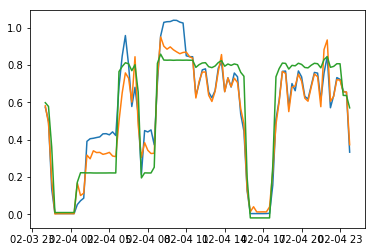

In [91]:
import matplotlib.pyplot as plt

date='2014-02-04'

plt.plot(df_out['y_13'][date])
plt.plot(df_out['tpot_test_no_0'][date])
plt.plot(df_out['linear_test_no_0'][date])

plt.show()

#df_out

In [80]:
df_out = pd.read_hdf('results/run_180207/df_out.h5','table')

In [78]:
df_out = pd.DataFrame()

In [79]:
df_out

""


In [12]:
df_test = pd.DataFrame()
test_no = 2

In [13]:
df_test['test_no'+str(test_no)] = 2

In [14]:
df_test

,test_no2


In [ ]:
for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/linear_test_no_" + str(test_no) + str(P) + ".png")
        
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_linear_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_linear.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn Linear model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_linear_test_no_" + str(test_no) + str(P) + ".png")
        
    
    # tpot model
    
    print('Test number, TPOT model: ', test_no, '\n')
    

    m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    m_tpot.fit(X_train, y_train.reshape(-1,))

    score = m_tpot.score(X_test,y_test)
    score_perc = m_tpot.score(X_test,y_test)/max(y_test)
    print('Score: ',score )
    print('Score in % of max: ',score_perc )
    
    results.append([test_no,'tpot',score,score_perc])
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = np.linspace(n1+1,n1+sample_n,sample_n)
    
    sizes = [[10,6],[12,8],[14,10]]
    for P in sizes:
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.plot(x,m_linear.predict(X)[n1:n1+sample_n])
        plt.plot(x,y[n1:n1+sample_n])

        ax.set(xlabel='sample no', ylabel='FO flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/tpot_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_tpot.predict(X)[n1:n1+sample_n],y[n1:n1+sample_n])

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_sample_tpot_test_no_" + str(test_no) + str(P) + ".png")
        
        fig, ax = plt.subplots()
        fig.set_size_inches(P)
        plt.scatter(m_tpot.predict(X),y)

        ax.set(xlabel='predicted flow m3/h', ylabel='measured flow m3/h',
               title='Sklearn TPOT model. Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
        ax.grid()

        fig.savefig("results/run_180205/scatter_all_tpot_test_no_" + str(test_no) + str(P) + ".png")
    
    

In [3]:
a = linear_model.LinearRegression()

In [ ]:
a.